In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

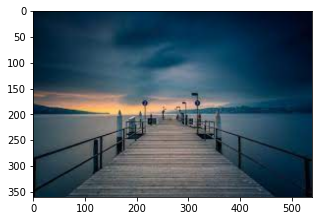

In [2]:
image_path = 'data/image1.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

back_img = 'data/back1.jfif'
back_img = cv2.imread(back_img)
back_img = cv2.cvtColor(back_img,cv2.COLOR_BGR2RGB)

img_size = img.shape[:2]

back_img = cv2.resize(back_img, (img_size[1],img_size[0]), interpolation = cv2.INTER_AREA)
img = cv2.resize(img, (img_size[1],img_size[0]), interpolation = cv2.INTER_AREA)

plt.figure(figsize=(5,5))
plt.imshow(back_img)

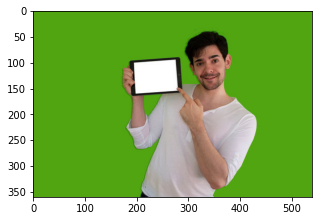

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')

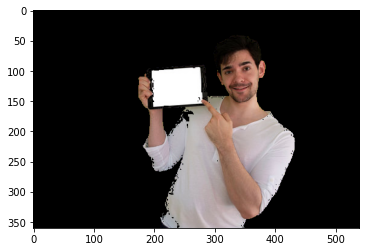

In [4]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower = (35,0,0)
upper = (85,255,255)
mask = cv2.inRange(hsv_img,lower,upper)
masked_img = img.copy()
masked_img[mask!=0] = [0,0,0]
plt.imshow(masked_img)

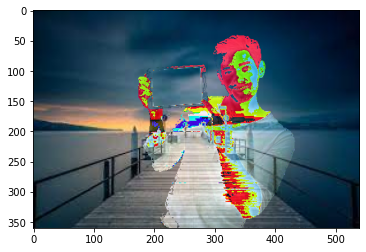

In [13]:
bitwiseOr = cv2.bitwise_xor(masked_img,back_img)
bitwiseOr = - masked_img + back_img

img = Image.fromarray(bitwiseOr)
plt.imshow(img)

In [ ]:
def get_image(img,img_siz):
    #img = 'data/image1.jpg'
    img = cv2.imread(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_siz, interpolation = cv2.INTER_AREA)
    return img

def img_size(img):
    #img = 'data/image1.jpg'
    img = cv2.imread(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img.shape[1],img.shape[0]

img_siz = img_size('data/image1.jpg')
print(img_siz)
img = get_image('data/image1.jpg',img_siz)
back_img = get_image('data/back1.jfif',img_siz)



plt.figure(figsize=(5,5))
plt.imshow(back_img)

In [ ]:
img = 'data/image1.jpg'
back_img = 'data/back1.jfif'
# im = Image.open(back_img)
# im = np.asarray(im)
# print(im)
# im = Image.fromarray(im)
# print(im)
from process import Process
im = Process(img,back_img).join_image()
plt.figure(figsize=(5,5))
plt.imshow(im)

In [17]:
# d={1:3,-2:1,5:34,0:4}
# sorted(d,key=d.values(),reverse=True)